In [2]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from PIL import Image


In [3]:
# Set the path to the dataset
dataset_dir =   r"C:\Users\mypc\Desktop\blood\dataset"

# Check the subdirectories (Classes)
classes = os.listdir(dataset_dir)
print("Classes:", classes)


Classes: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [4]:
# Parameters
img_size = (224, 224)
data = []
labels = []

# Load and preprocess images
for category in classes:
    folder_path = os.path.join(dataset_dir, category)
    for img_name in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img_name)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(img_size)
            img_array = np.array(img) / 255.0  # Normalize
            data.append(img_array)
            labels.append(category)
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")

# Convert to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (1001, 224, 224, 3)
Labels shape: (1001, 8)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (800, 224, 224, 3) (800, 8)
Testing set: (201, 224, 224, 3) (201, 8)


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax')  # Output layer for classification
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\mypc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,992 (42.61 MB)

 Trainable params: 11,169,992 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Training the model
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=20,
    verbose=2
)


Epoch 1/20


c:\Users\mypc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 - 88s - 4s/step - accuracy: 0.1525 - loss: 2.4302 - val_accuracy: 0.1244 - val_loss: 2.1308
Epoch 2/20
25/25 - 63s - 3s/step - accuracy: 0.1488 - loss: 2.0736 - val_accuracy: 0.1244 - val_loss: 2.0549
Epoch 3/20
25/25 - 73s - 3s/step - accuracy: 0.1750 - loss: 2.0469 - val_accuracy: 0.1294 - val_loss: 2.0395
Epoch 4/20
25/25 - 64s - 3s/step - accuracy: 0.1725 - loss: 2.0398 - val_accuracy: 0.1791 - val_loss: 2.0164
Epoch 5/20
25/25 - 72s - 3s/step - accuracy: 0.1800 - loss: 2.0368 - val_accuracy: 0.1493 - val_loss: 1.9451
Epoch 6/20
25/25 - 74s - 3s/step - accuracy: 0.2188 - loss: 1.9961 - val_accuracy: 0.1940 - val_loss: 1.8678
Epoch 7/20
25/25 - 71s - 3s/step - accuracy: 0.2262 - loss: 1.9319 - val_accuracy: 0.2587 - val_loss: 1.8281
Epoch 8/20
25/25 - 61s - 2s/step - accuracy: 0.2350 - loss: 1.9414 - val_accuracy: 0.3134 - val_loss: 1.7431
Epoch 9/20
25/25 - 61s - 2s/step - accuracy: 0.2400 - loss: 1.9367 - val_accuracy: 0.2239 - val_loss: 1.8245
Epoch 10/20
25/25 - 63s - 3s/s

In [ ]:
# Evaluate model performance
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)


7/7 - 3s - 391ms/step - accuracy: 0.3682 - loss: 1.5620

Test Accuracy: 0.3681592047214508


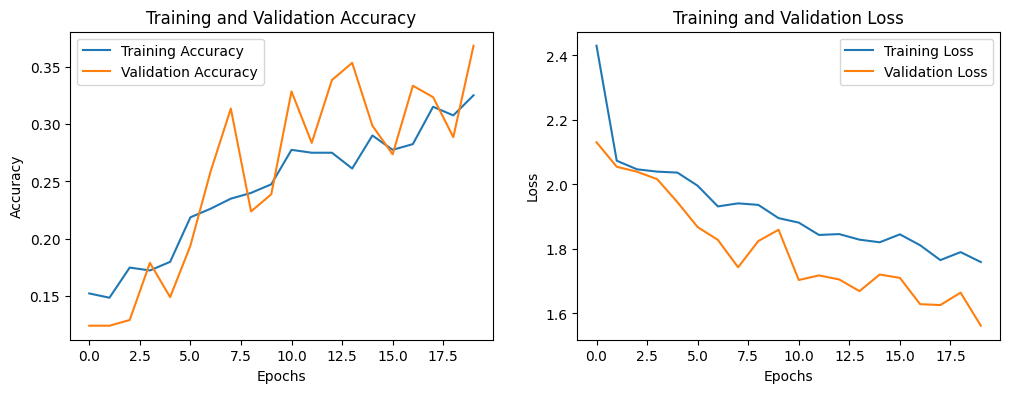

In [ ]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [ ]:
model.save('blood_group_model.h5')
print("Model saved as blood_group_model.h5")


Model saved as blood_group_model.h5


In [ ]:
def predict_blood_group(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(img_size)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    blood_group = lb.classes_[class_index]
    return blood_group

# Test on a new image
sample_image = os.path.join(dataset_dir, classes[0], os.listdir(os.path.join(dataset_dir, classes[0]))[0])
predicted_class = predict_blood_group(sample_image)
print("Predicted Blood Group:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Predicted Blood Group: A-
